### Task to be completed:
 >Iris Flower Classification:

 - Task: Classify iris flowers into three species (setosa versicolor, virginica) based on sepal length, sepal width petal length, and petal width.

- Dataset: Use the famous Iris dataset, which is available in most machine learning libraries.

 

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:skyblue;">About Data Iris Flower</p>

***The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.***

***[DataSet Link](https://www.kaggle.com/datasets/uciml/iris)***

***It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.***

***The columns in this dataset are***:

***`Id`***

***`SepalLengthCm`***

***`SepalWidthCm`***

***`PetalLengthCm`***

***`PetalWidthCm`***

***`Species`***

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:skyblue;">Aims and Objective</p>


***1. **Data Exploration:***** ***Perform comprehensive EDA to gain insights into the dataset's structure, features, and distributions. Explore statistical summaries, visualizations, and correlations among variables.***

**2. **Model Development:**** ***Implement various ML algorithms such as Decision Trees, Random Forest, Support Vector Machines (SVM),  k-Nearest Neighbors (k-NN), MLP-Neural Networks and Xgboost Classifier for classification tasks. Evaluate each model's performance using appropriate metrics like accuracy, precision, recall, and F1-score.***

In [1]:
# importing packages(libraires)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
df = pd.read_csv("Iris.csv")
# check the first five rows on the data.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:skyblue;">Exploring Data</p>

In [4]:
# checking the shape of the data
df.shape

(150, 6)

In [5]:
# check the null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

> there is no null values in the data.

In [6]:
# get the genaral info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# make a copy of the original data
df = df.copy()

### Data Cleaning:
- Drop the ID Column:

In [8]:
df = df.drop("Id", axis=1)
# check
df.head(2) # display the first 5 rown of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


#### check if the data has some  duplicates

In [9]:
df.duplicated().any()

True

*the are some duplicates values in our dataset*

In [10]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


- There duplicate data in our dataset so we drop:

In [11]:
df = df[~df.duplicated()]
# check if duplicates have dropped
df.shape

(147, 5)

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:skyblue;">Explonatory Ananlysis(EDA)</p>

In [12]:
# check the distribution of the numerical columns:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Univariate Analysis

- Target Variable(Species)

In [13]:
# check the target variable:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

> There are 3 types on iris flowers in the dataset, each having 50 observations

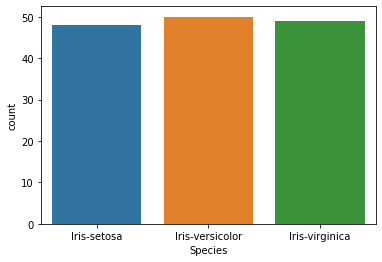

In [14]:
sns.countplot(x='Species', data=df, )
plt.show()

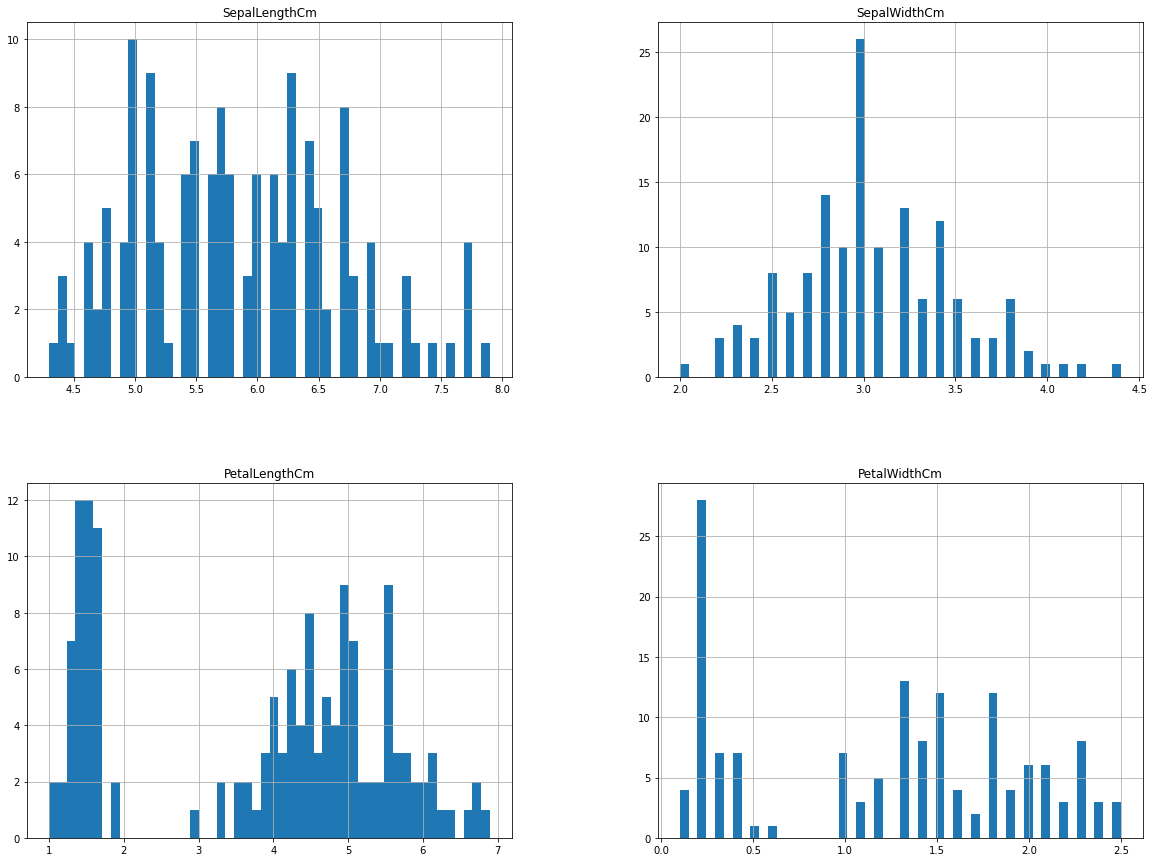

In [15]:
df.hist(bins=50,figsize=(20, 15))
plt.show()

##### Bivariate Analysis 

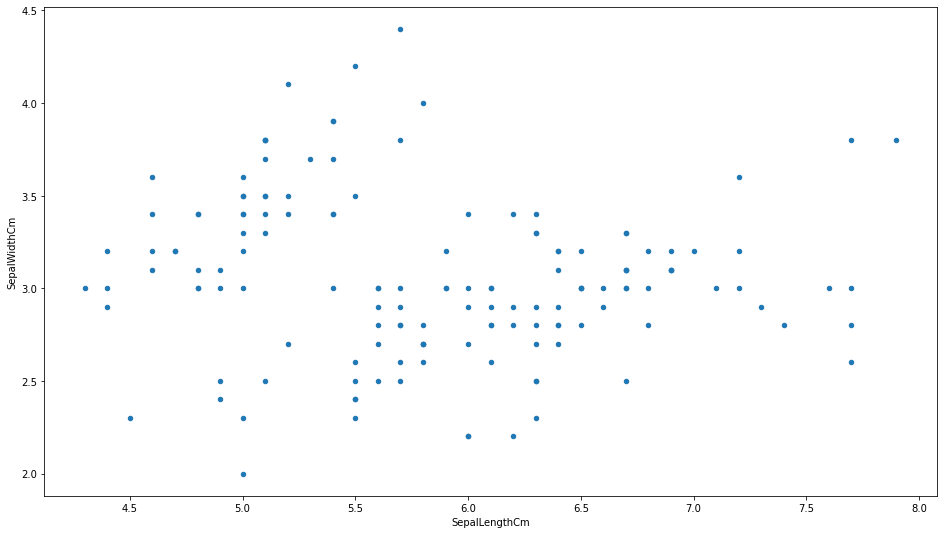

In [16]:
df.plot(x ="SepalLengthCm", y="SepalWidthCm",kind="scatter", figsize=(16,9));

SepalLengthCm vs SepalWidthCm doesn't depicts a clear correlation between them.

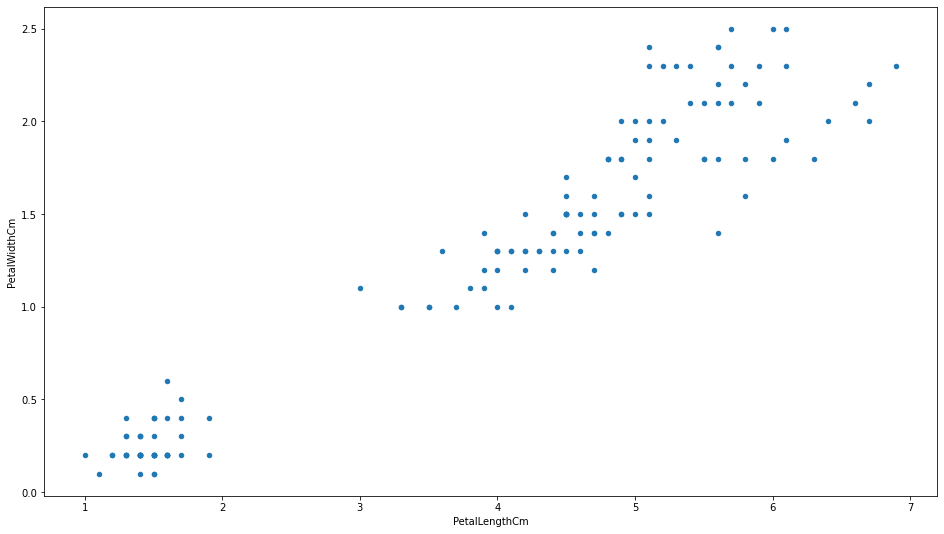

In [17]:
df.plot(x ="PetalLengthCm", y="PetalWidthCm",kind="scatter", figsize=(16,9));

In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

PetalLengthCm  and PetalWidthCm depicts a strong postive correlation

#### Multivariate Analysis

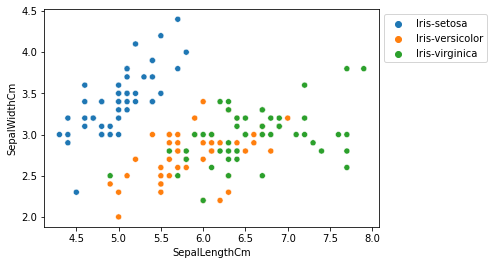

In [19]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

From above we can tell iris setosa is unique from the rest as it's segmented from the others.

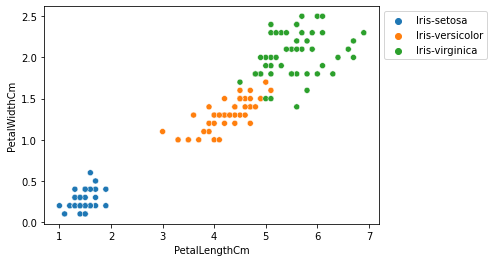

In [20]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
#plt.title()
 
plt.show()

> The above scatterplot show that the 3 flowers can be easily segemented into 3 groups.

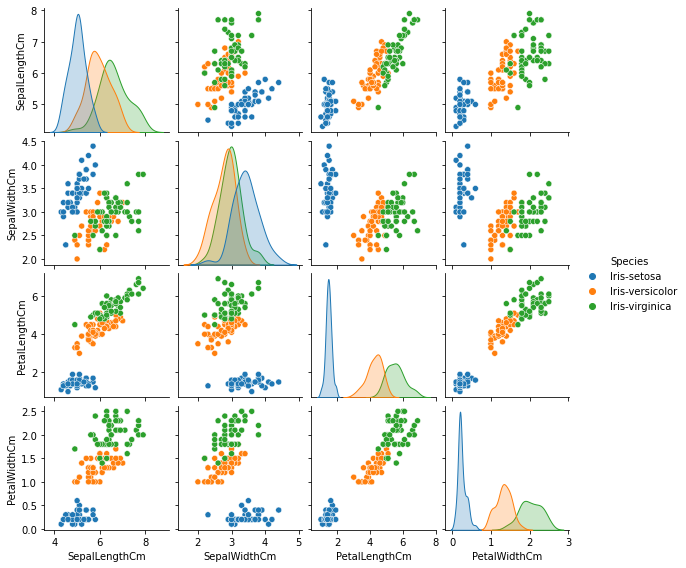

In [21]:
sns.pairplot(df, hue='Species', height=2);

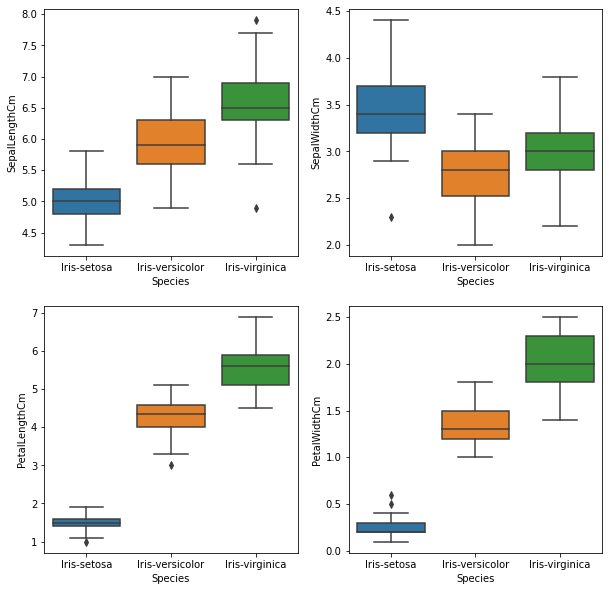

In [22]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)
 
plt.figure(figsize=(10,10))
     
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')
 
plt.subplot(222)
graph('SepalWidthCm')
 
plt.subplot(223)
graph('PetalLengthCm')
 
plt.subplot(224)
graph('PetalWidthCm')
 
plt.show()

There a few outliers on the dataset, consider dropping to reduce model biaseness

Drop Outliers:

In [23]:
def drop_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [24]:
# drop outliers from all columns
df_cleaned = drop_outliers(df)
df_cleaned.shape

(143, 5)

In [25]:
def plot_boxplot(df, column_name):
    """
    Plot a boxplot of a column in the DataFrame.

    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - column_name: str
        The name of the column for which to plot the boxplot.
    """
    # Create a boxplot of the specified column
    plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
    df.boxplot(column=column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

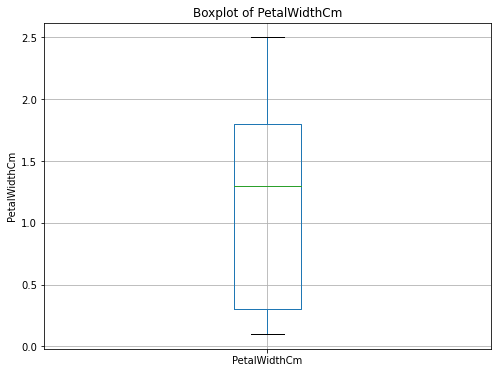

In [26]:
plot_boxplot(df_cleaned, 'PetalWidthCm')

#### HeatMap Correlation

<AxesSubplot:>

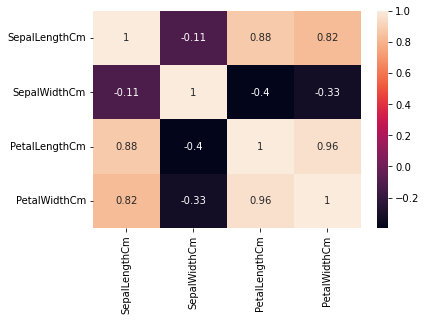

In [27]:
corr = df_cleaned.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True)

##### Separate  the data into set-features and Variable Y in Python.

In [28]:
X = df_cleaned.drop("Species", axis=1)
y = df_cleaned['Species']

In [29]:
print(y.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [30]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#### Train Test split the dataset to get training and test dataset

In [31]:
# Splitting the data into Training and Testing sets, use 20% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [32]:
X_train.shape, X_test.shape

((114, 4), (29, 4))

### Modeling.
- Model Building.
- Evaluation of the model.

In [33]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1-score: 0.9654308184253738


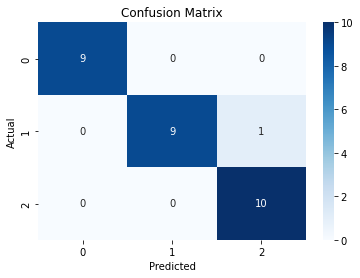

In [34]:
# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1-score: 0.9654308184253738


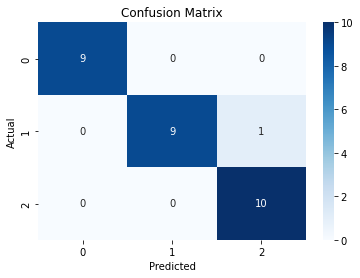

In [35]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate 
accuracy_knn = evaluate_results(y_test, y_pred_knn)

Accuracy: 0.9310344827586207
Precision: 0.942528735632184
Recall: 0.9310344827586207
F1-score: 0.9303378613723441


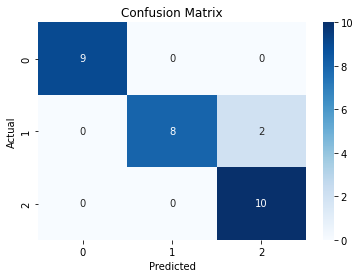

In [36]:
# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

Accuracy: 0.9310344827586207
Precision: 0.9310344827586207
Recall: 0.9310344827586207
F1-score: 0.9310344827586207


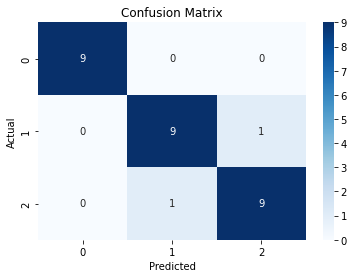

In [37]:
#Creating an XGBoost classifier
xgb_model = xgb.XGBClassifier()

#Training the model on the training data
xgb_model.fit(X_train, y_train)

#Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = evaluate_results(y_test, y_pred_xgb)

Accuracy: 0.9655172413793104
Precision: 0.9686520376175548
Recall: 0.9655172413793104
F1-score: 0.9654308184253738


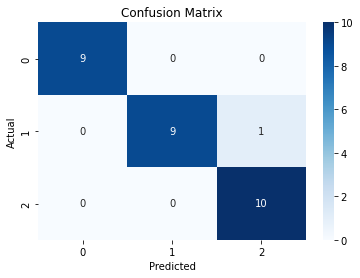

In [38]:
from sklearn.neural_network import MLPClassifier

# Initialize the Multi-layer Perceptron (MLP) classifier
# You can adjust the parameters like hidden_layer_sizes, activation, etc., according to your needs
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy_mlp = evaluate_results(y_test, y_pred_mlp)

In [39]:
import pickle

# Pickle the trained model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)